# 1. Loading and Exploring the Dataset

,patient id,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0



'patient id' column dropped.


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.600000,0.78400,3.249000,132.27000,203.371000,0.224000,0.661000,138.181000,0.396000,0.916000,1.629000,0.540000
std,9.336336,0.41172,0.927286,18.28933,106.739593,0.417131,0.841895,25.453922,0.489309,1.069621,0.614603,0.498647
min,28.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.00000,3.000000,120.00000,179.750000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.00000,4.000000,130.00000,226.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.00000,4.000000,140.00000,268.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.00000,4.000000,200.00000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


,Missing Values,Percentage


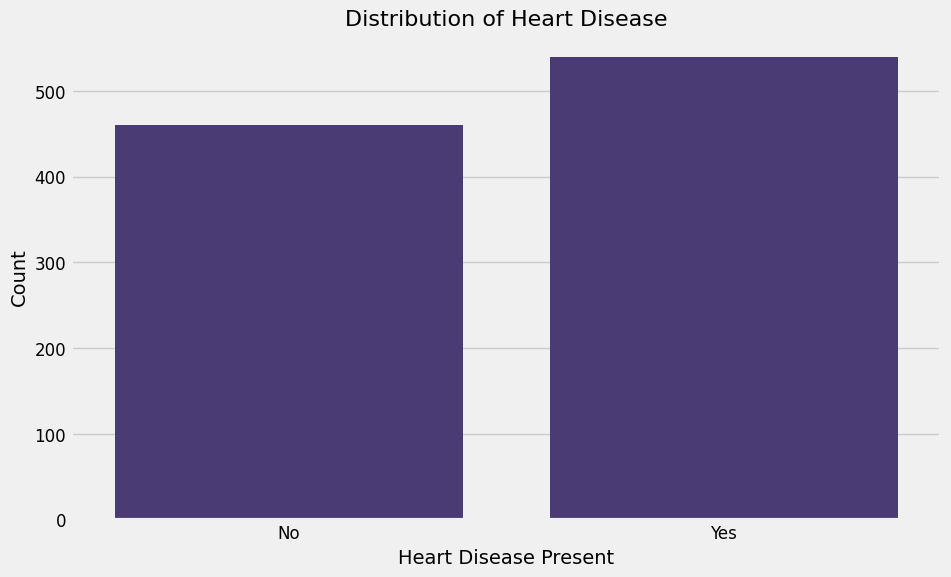


Count of patients with and without heart disease:
heart disease
1    540
0    460
Name: count, dtype: int64
Percentage with heart disease: 54.00%


Cleaned data saved to 'cleaned_heart_disease.csv'.


In [ ]:
# Install required packages
!pip install xgboost imbalanced-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Display the first few rows of the dataset using display instead of print
display(data.head())

# Drop the 'patient id' column if it exists
if 'patient id' in data.columns:
    data.drop('patient id', axis=1, inplace=True)
    print("\n'patient id' column dropped.")
else:
    print("\nNo 'patient id' column to drop.")

# Summary statistics and data types
display(data.describe())
display(data.dtypes)

# Check for any missing values and calculate the percentage of missing values for each feature
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
display(missing_data[missing_data['Missing Values'] > 0])

# Display the distribution of the target variable - heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='heart disease', data=data)
plt.title('Distribution of Heart Disease', fontsize=16)
plt.xlabel('Heart Disease Present', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Count of patients with and without heart disease
print("\nCount of patients with and without heart disease:")
print(data['heart disease'].value_counts())
print(f"Percentage with heart disease: {data['heart disease'].mean() * 100:.2f}%")

# Create box plots for numerical features
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for col in numerical_cols:
    fig = px.box(data, y=col, title=f'Box Plot of {col}')
    fig.show()

# Saving the cleaned data to a new CSV file
data.to_csv('cleaned_heart_disease.csv', index=False)
print("Cleaned data saved to 'cleaned_heart_disease.csv'.")

# Correlation Analysis and Visualization

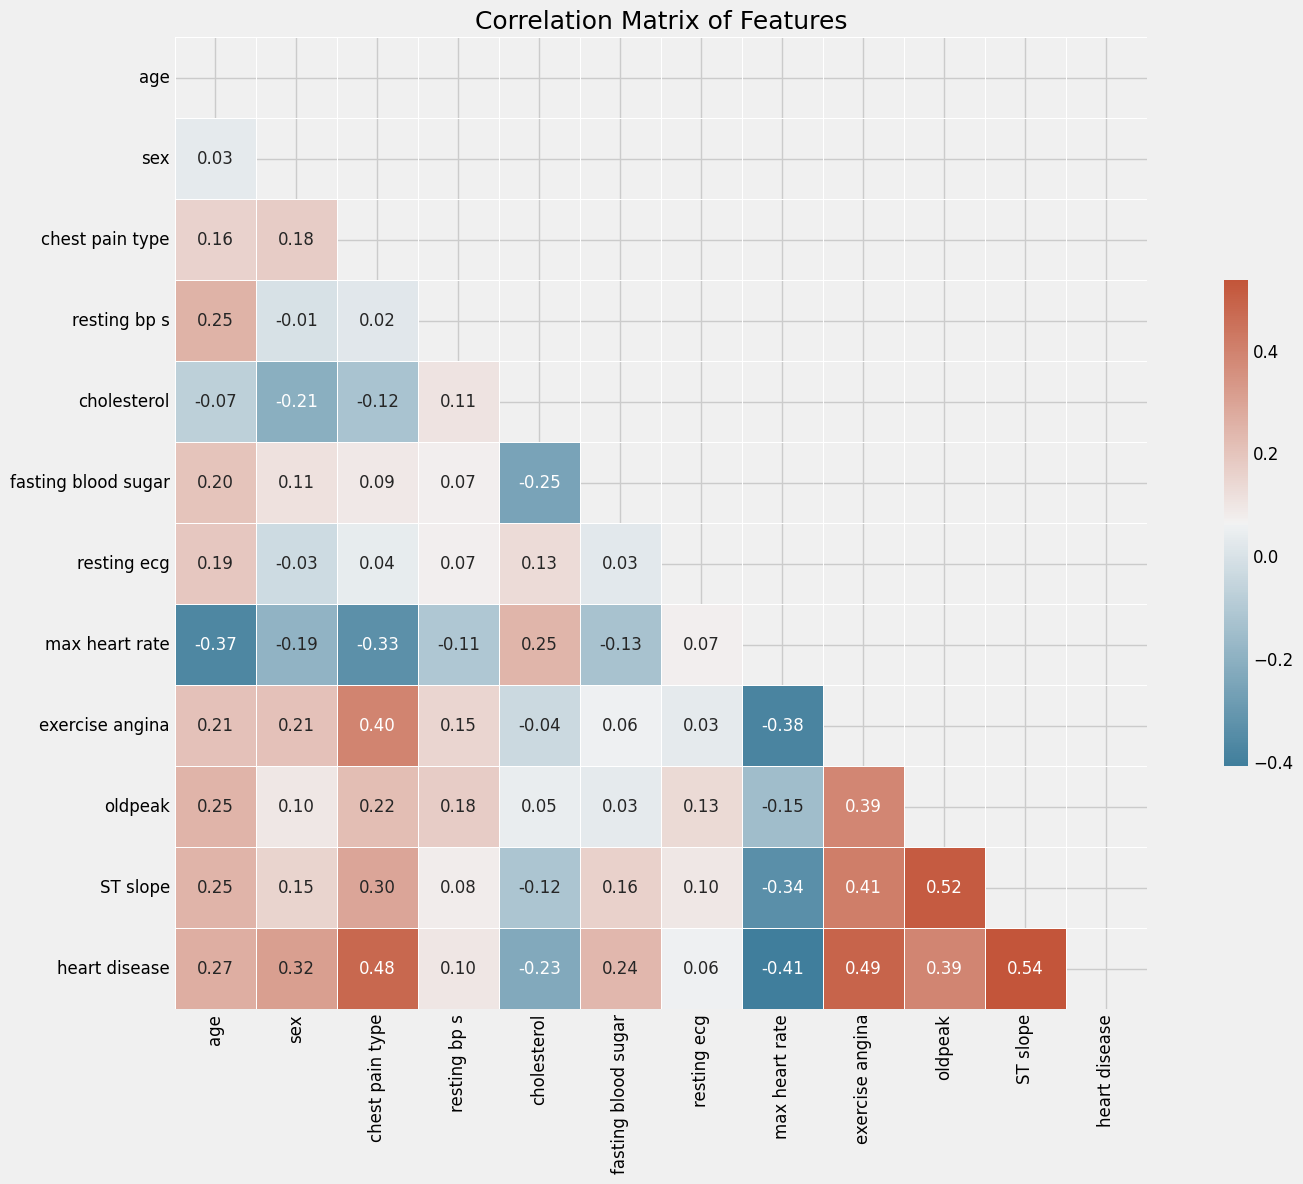

Correlations with Target (Heart Disease):
heart disease          1.000000
ST slope               0.536772
exercise angina        0.488865
chest pain type        0.479601
oldpeak                0.390294
sex                    0.315167
age                    0.269196
fasting blood sugar    0.240817
resting bp s           0.099245
resting ecg            0.059754
cholesterol           -0.228265
max heart rate        -0.408266
Name: heart disease, dtype: float64


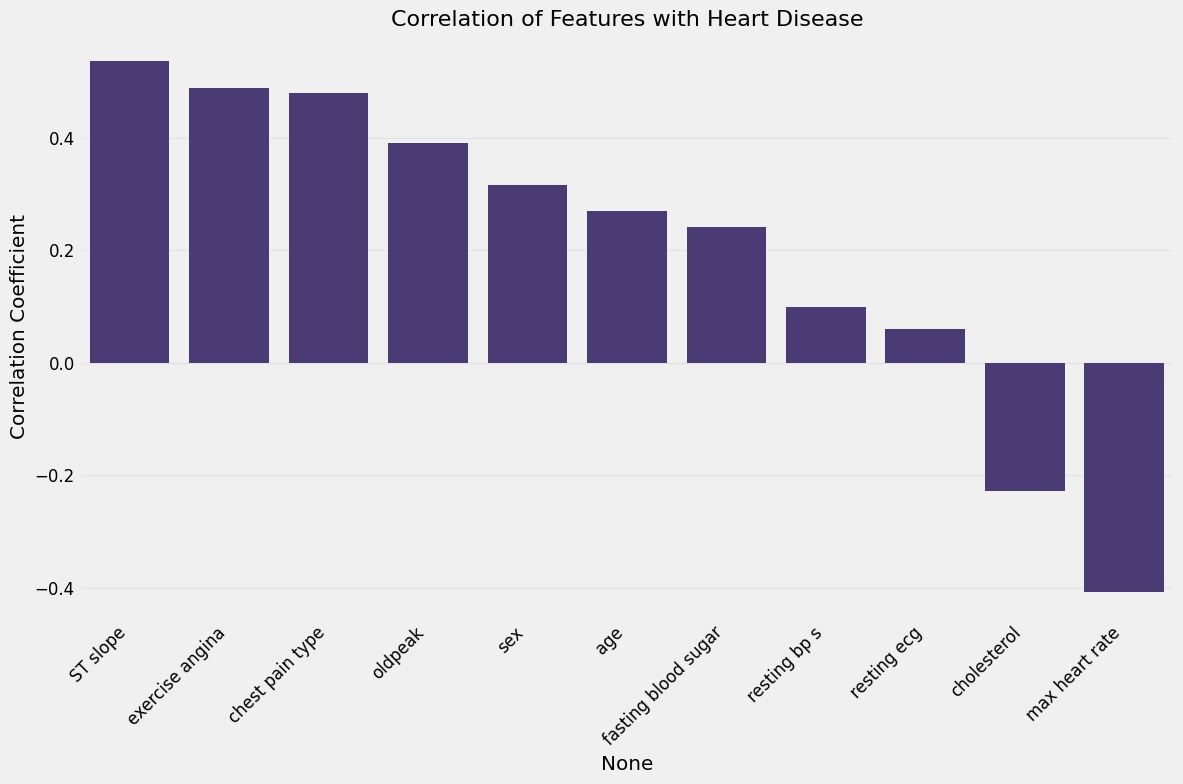

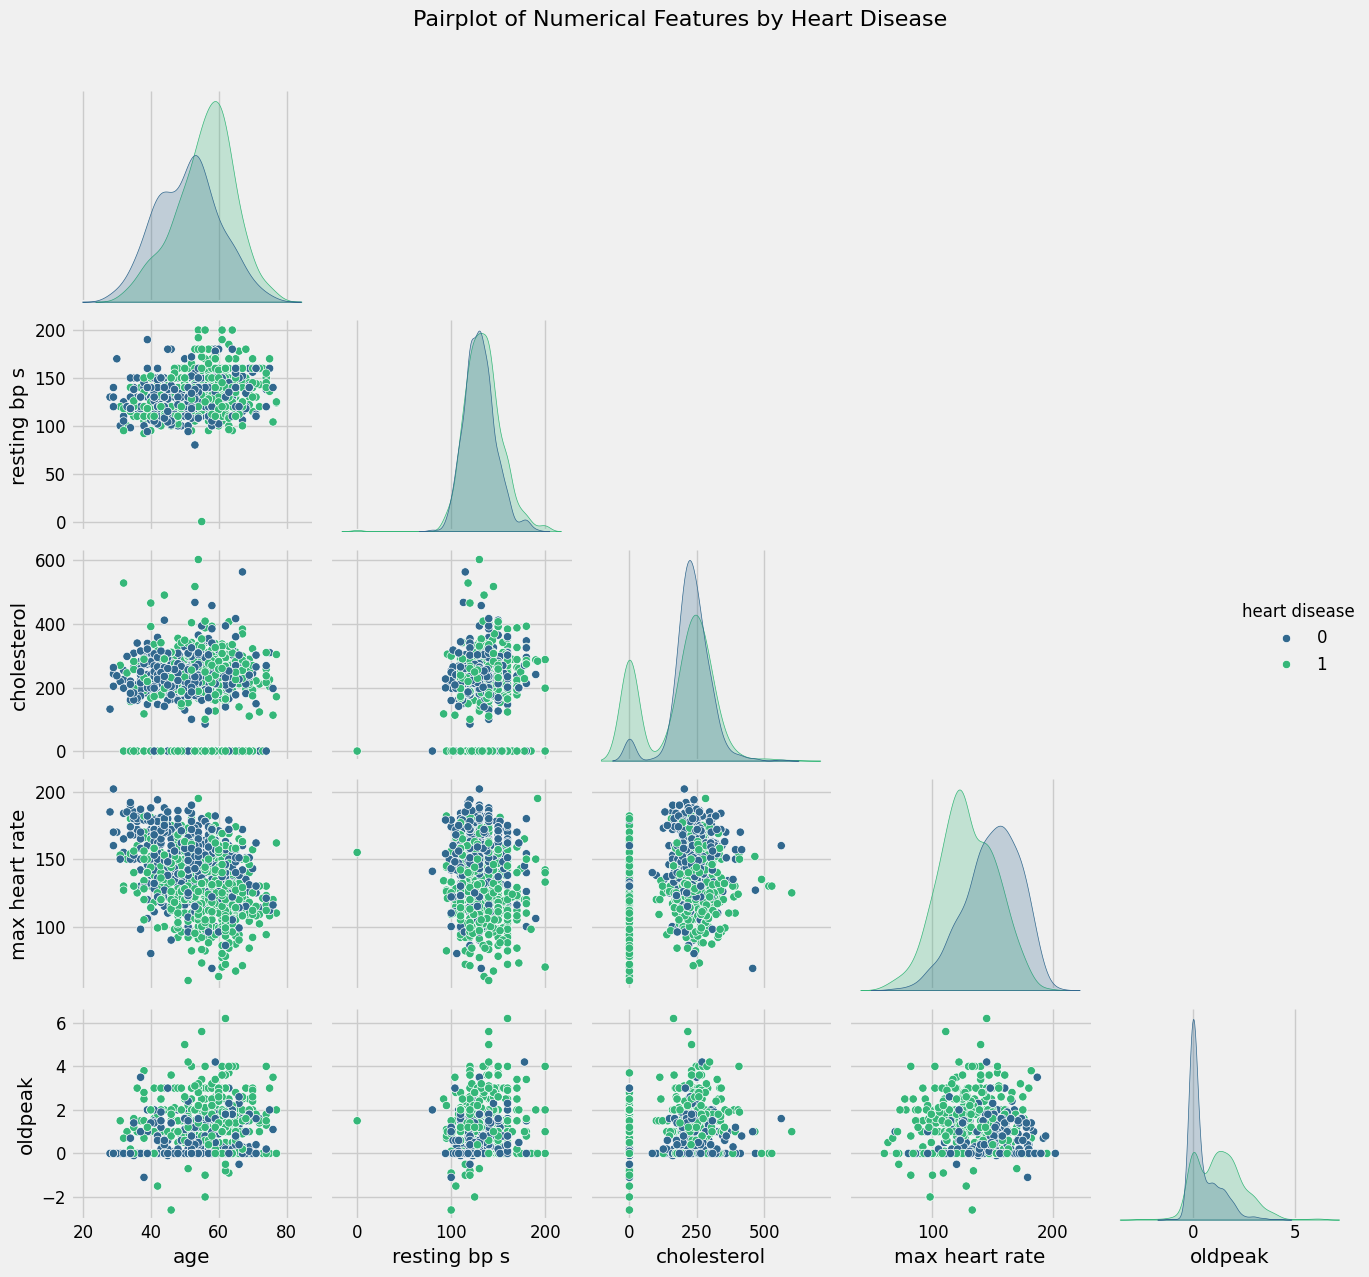

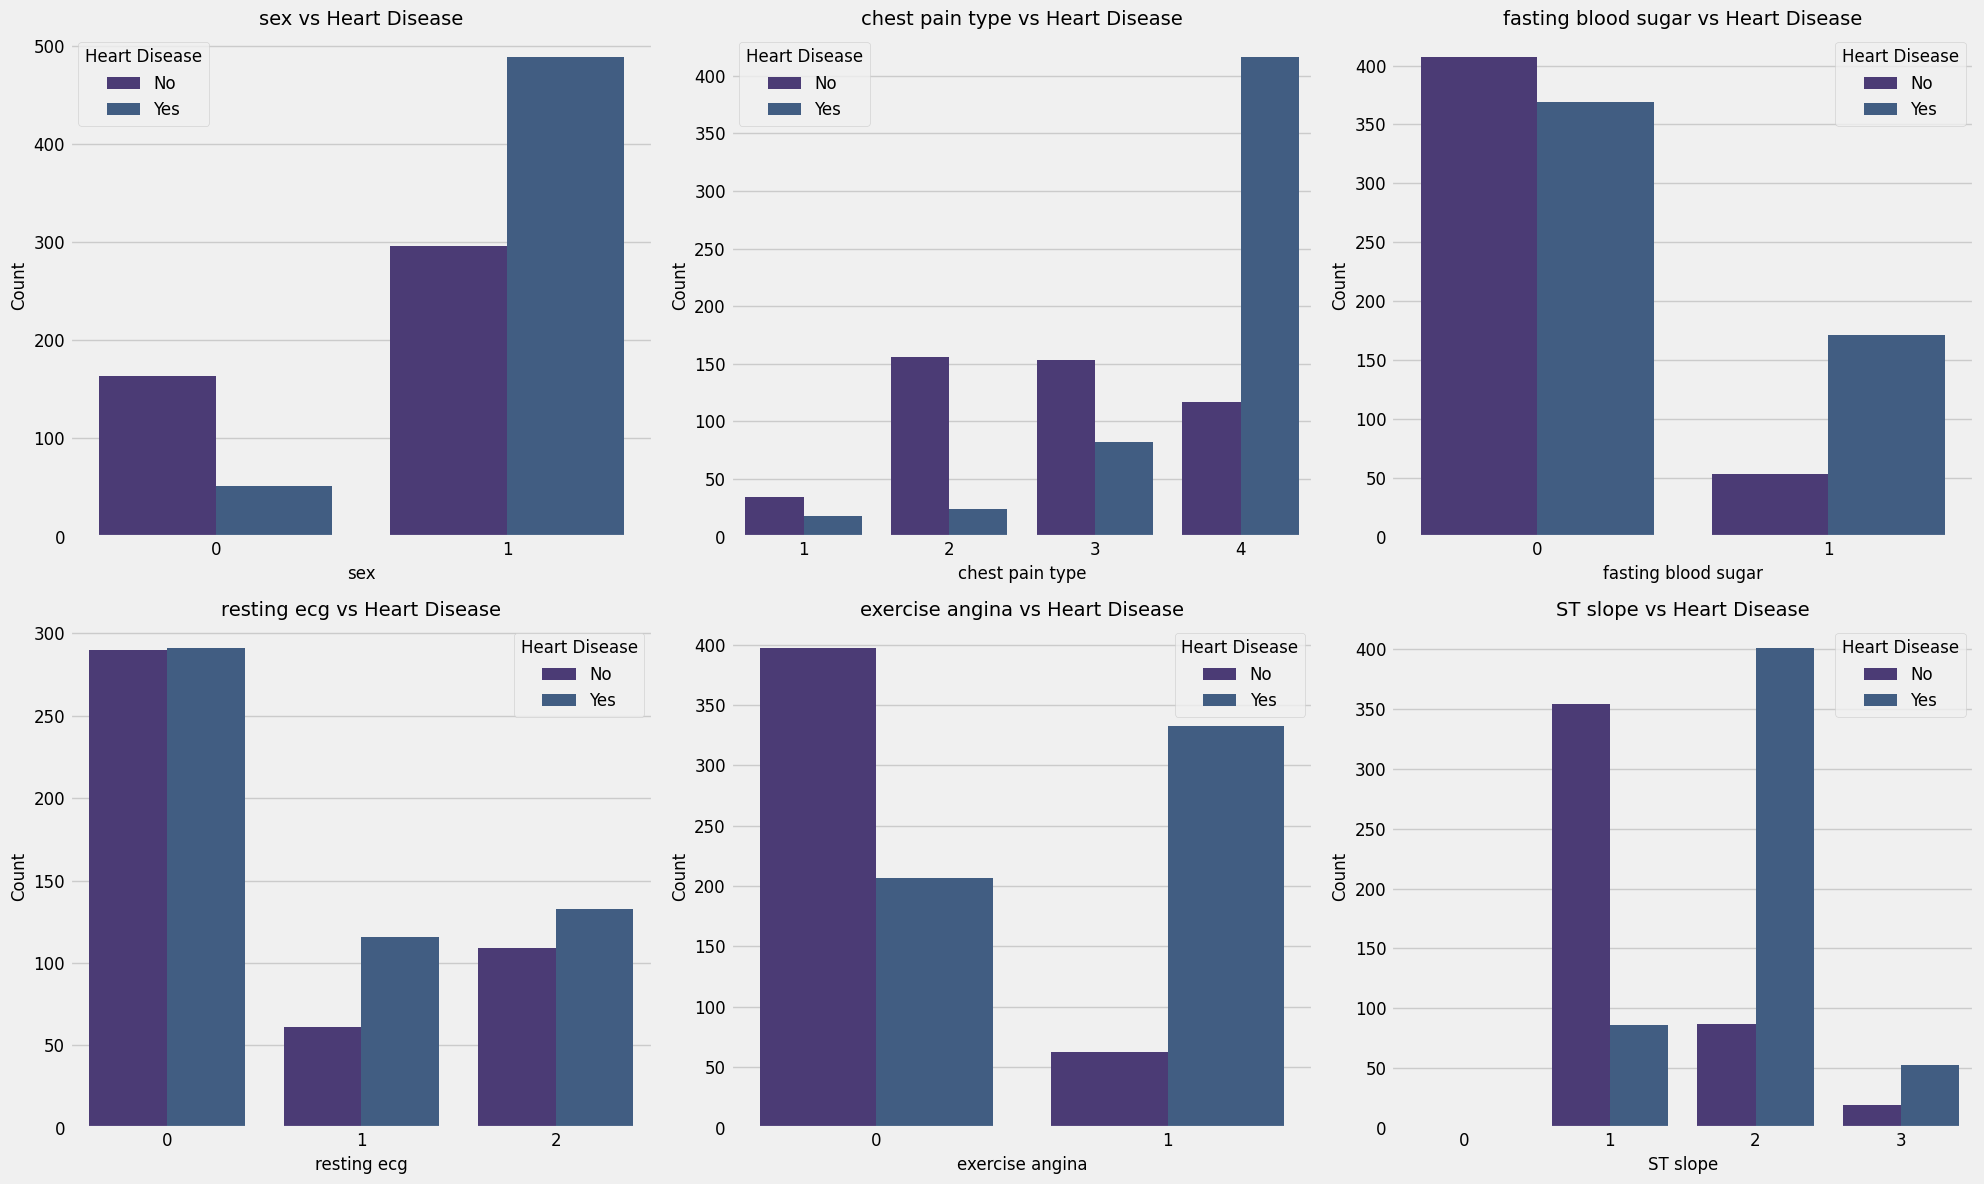

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f',
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Features', fontsize=18)
plt.tight_layout()
plt.show()

# Analysis of correlation with target
correlation_with_target = corr_matrix['heart disease'].sort_values(ascending=False)
print("Correlations with Target (Heart Disease):")
print(correlation_with_target)

# Visualize the correlation with target
plt.figure(figsize=(12, 8))
correlation_with_target = correlation_with_target.drop('heart disease')  # Drop the correlation with itself
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation of Features with Heart Disease', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize relationships between important numerical variables
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
sns.pairplot(data, vars=numerical_features, hue='heart disease', palette='viridis', corner=True)
plt.suptitle('Pairplot of Numerical Features by Heart Disease', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Categorical variable analysis with the target
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar',
                         'resting ecg', 'exercise angina', 'ST slope']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x=feature, hue='heart disease', data=data, ax=axes[i])
        axes[i].set_title(f'{feature} vs Heart Disease', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Statistical Significance of Features

Creating interaction features...
Added engineered features: ['age_cholesterol', 'max_hr_oldpeak']

--- Statistical Significance of Categorical Features ---
sex: Chi2 = 97.80, p-value = 0.0000
chest pain type: Chi2 = 286.34, p-value = 0.0000
fasting blood sugar: Chi2 = 56.84, p-value = 0.0000
resting ecg: Chi2 = 13.16, p-value = 0.0014
exercise angina: Chi2 = 236.99, p-value = 0.0000
ST slope: Chi2 = 377.63, p-value = 0.0000

--- Statistical Significance of Numerical Features ---
age: t-statistic = -8.83, p-value = 0.0000
resting bp s: t-statistic = -3.15, p-value = 0.0017
cholesterol: t-statistic = 7.41, p-value = 0.0000
max heart rate: t-statistic = 14.13, p-value = 0.0000
oldpeak: t-statistic = -13.39, p-value = 0.0000
age_cholesterol: t-statistic = 4.16, p-value = 0.0000
max_hr_oldpeak: t-statistic = -11.36, p-value = 0.0000


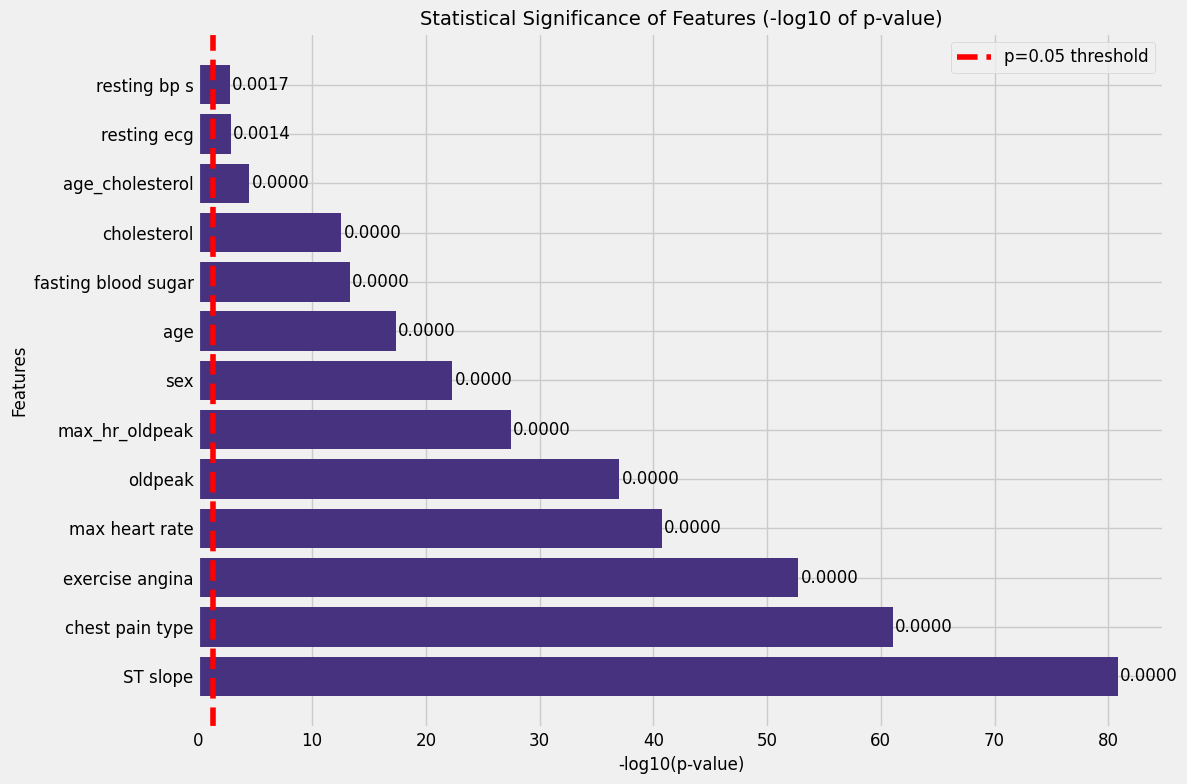

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind

# Define the categorical and numerical features
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
target = 'heart disease'

# Create interaction features
print("Creating interaction features...")
data['age_cholesterol'] = data['age'] * data['cholesterol']
data['max_hr_oldpeak'] = data['max heart rate'] * data['oldpeak']

# Add new features to feature list
engineered_features = ['age_cholesterol', 'max_hr_oldpeak']
print(f"Added engineered features: {engineered_features}")

# Analyze categorical features (Chi-Square Test)
print("\n--- Statistical Significance of Categorical Features ---")
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2:.2f}, p-value = {p_value:.4f}")

# Analyze numerical features (T-Test)
print("\n--- Statistical Significance of Numerical Features ---")
for feature in numerical_features + engineered_features:
    group_0 = data[data[target] == 0][feature]
    group_1 = data[data[target] == 1][feature]
    t_stat, p_value = ttest_ind(group_0, group_1)
    print(f"{feature}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Visualize statistical significance of all features
all_features = categorical_features + numerical_features + engineered_features
p_values = []

# Calculate p-values for all features
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_values.append((feature, p_value))

for feature in numerical_features + engineered_features:
    group_0 = data[data[target] == 0][feature]
    group_1 = data[data[target] == 1][feature]
    t_stat, p_value = ttest_ind(group_0, group_1)
    p_values.append((feature, p_value))

# Sort by p-value and create dataframe
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'p-value'])
p_values_df = p_values_df.sort_values('p-value')

# Plot p-values
plt.figure(figsize=(12, 8))
bars = plt.barh(p_values_df['Feature'], -np.log10(p_values_df['p-value']))
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--', label='p=0.05 threshold')
plt.xlabel('-log10(p-value)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Statistical Significance of Features (-log10 of p-value)', fontsize=14)
plt.legend()

# Add p-value annotations
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height()/2,
             f'{p_values_df.iloc[i]["p-value"]:.4f}',
             va='center')

plt.tight_layout()
plt.show()

# Data Preprocessing and Splitting for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Combine all features
all_features = categorical_features + numerical_features + engineered_features

# Select features and target
X = data[all_features]
y = data[target]

print("Features used:", X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Apply SMOTE to balance training data
print("Applying SMOTE to balance training data...")
print("Original class distribution:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Report the new distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Replace original training data with balanced data
X_train = X_train_resampled
y_train = y_train_resampled

# Convert categorical features to numeric (fixing XGBoost compatibility)
print("Converting categorical features to numeric...")
categorical_cols = X_train.select_dtypes(include=['category']).columns

if len(categorical_cols) > 0:
    print(f"Found categorical columns: {list(categorical_cols)}")
    # Convert categorical columns to numeric
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('int')
        X_test[col] = X_test[col].astype('int')
    print("Conversion complete.")

# Scale the numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Data preprocessing complete. Data is ready for model training.")

Features used: ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'age_cholesterol', 'max_hr_oldpeak']
Training set size: 800 samples
Testing set size: 200 samples
Applying SMOTE to balance training data...
Original class distribution:
heart disease
1    433
0    367
Name: count, dtype: int64
Class distribution after SMOTE:
heart disease
0    433
1    433
Name: count, dtype: int64
Converting categorical features to numeric...
Data preprocessing complete. Data is ready for model training.


# Logistic Regression with L1 and L2 Regularization

Training Logistic Regression Models with Regularization...

1. Logistic Regression with L1 (Lasso) Regularization

2. Logistic Regression with L2 (Ridge) Regularization

L1 (Lasso) Regularization Accuracy: 0.87
L2 (Ridge) Regularization Accuracy: 0.87

Classification Report (L1 Regularization):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        93
           1       0.87      0.89      0.88       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200


Classification Report (L2 Regularization):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        93
           1       0.87      0.89      0.88       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



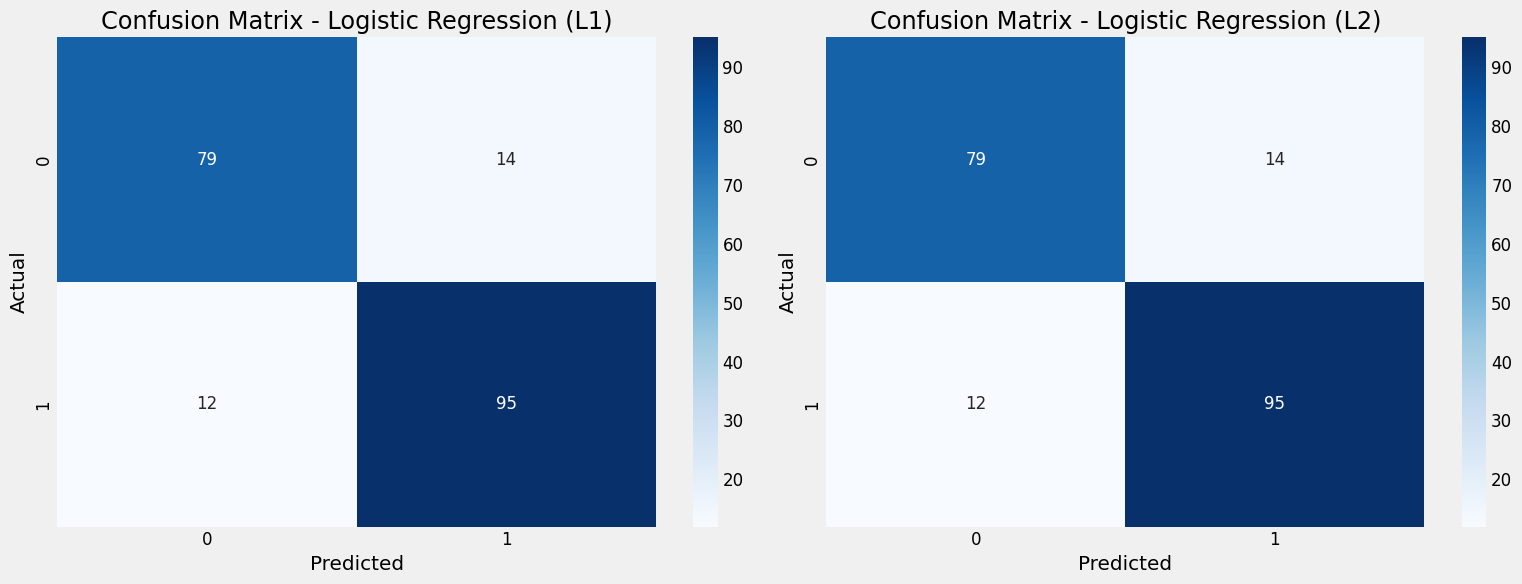

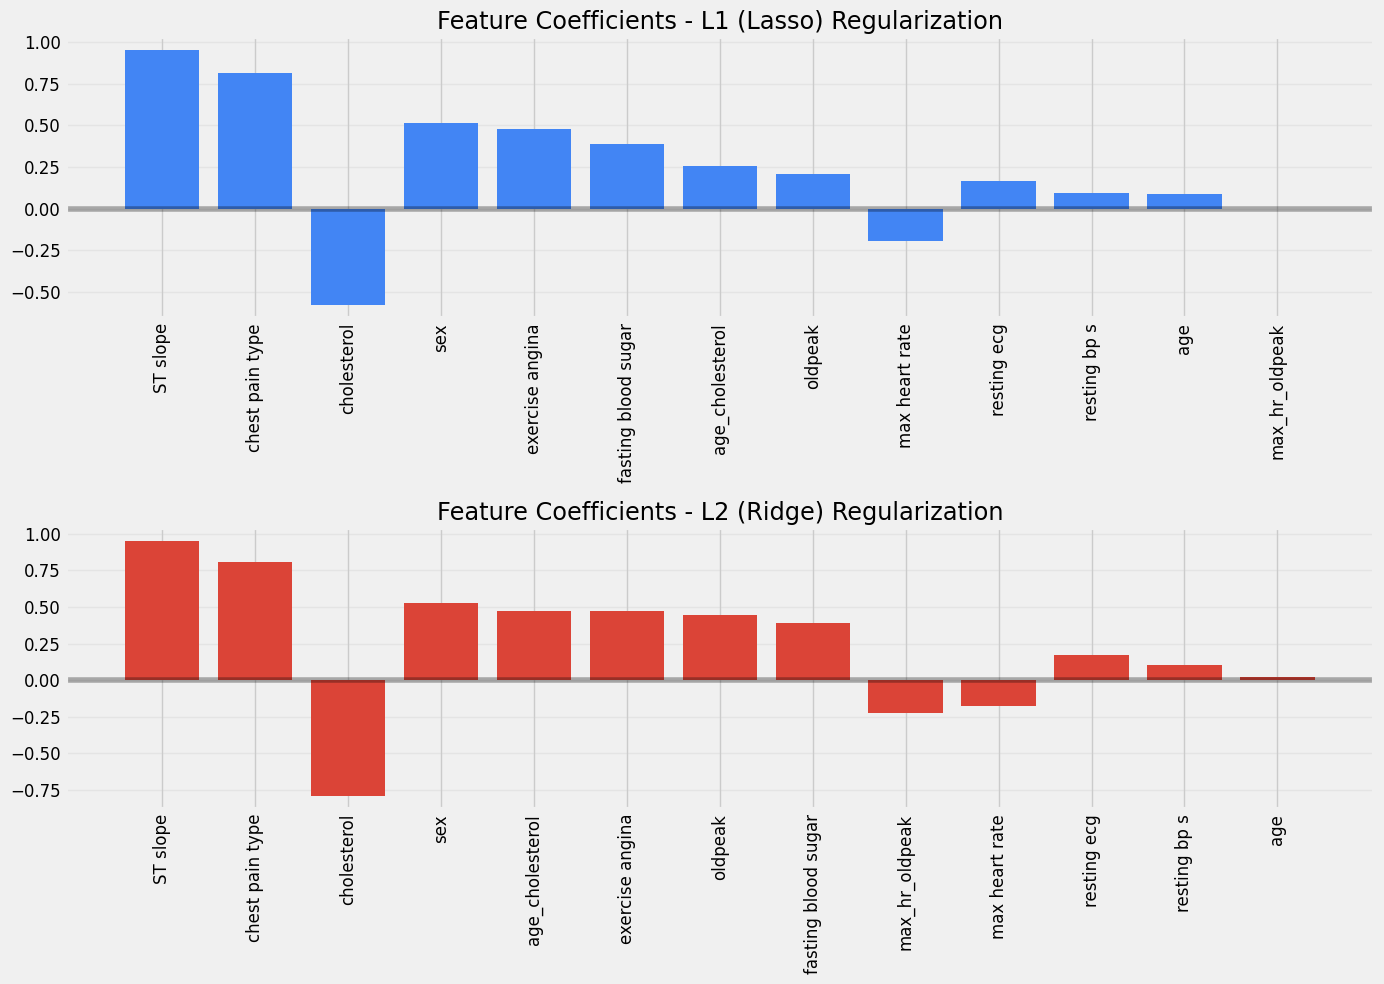

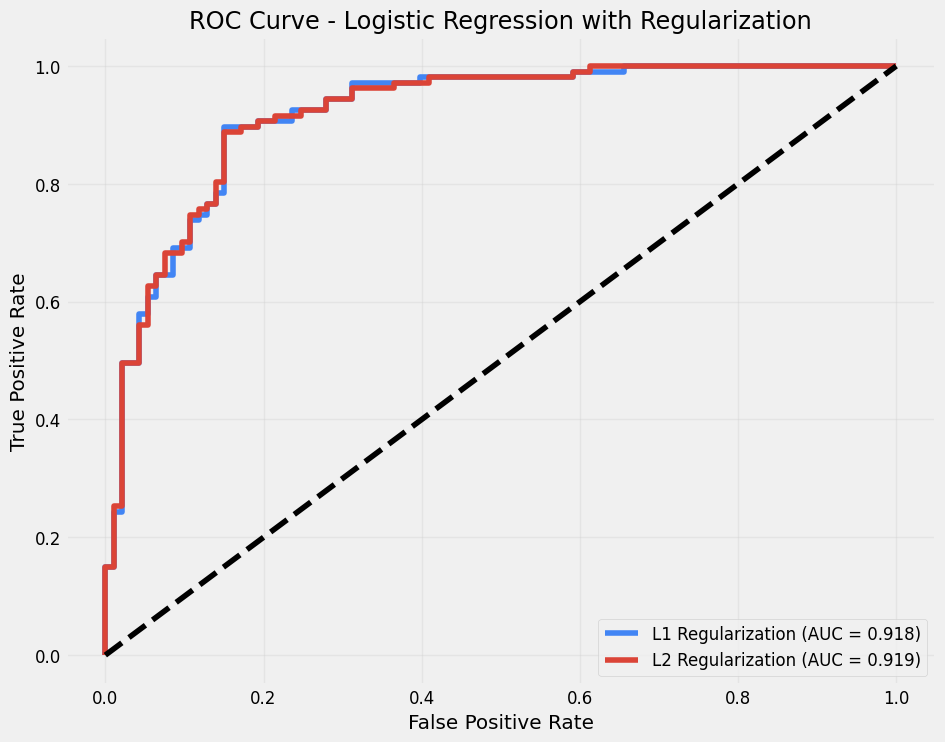

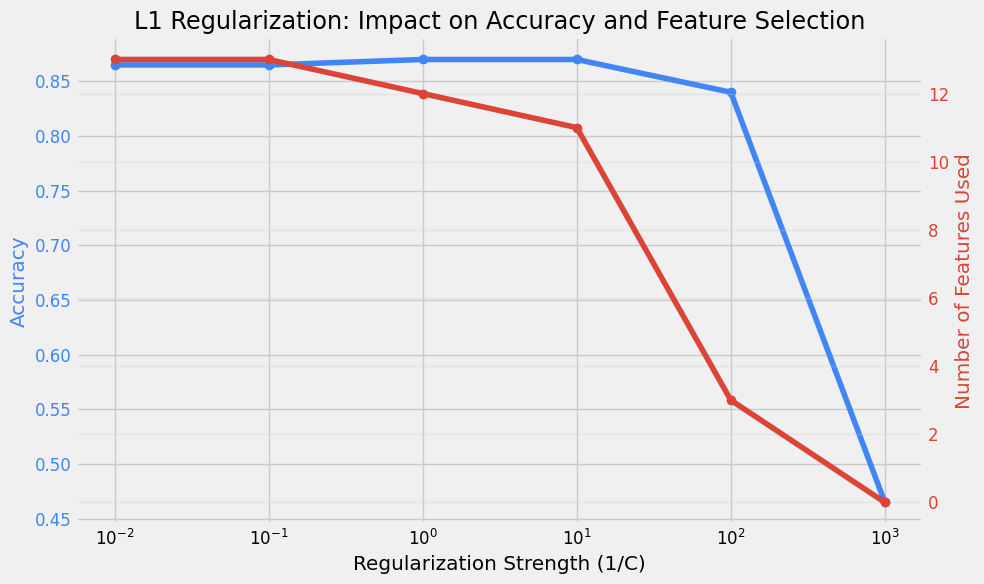

In [ ]:
# Logistic Regression with L1 and L2 Regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

print("Training Logistic Regression Models with Regularization...")

# L1 Regularization (Lasso)
print("\n1. Logistic Regression with L1 (Lasso) Regularization")
lr_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr_l1.fit(X_train, y_train)

# L2 Regularization (Ridge)
print("\n2. Logistic Regression with L2 (Ridge) Regularization")
lr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
lr_l2.fit(X_train, y_train)

# Make predictions
lr_l1_predictions = lr_l1.predict(X_test)
lr_l1_probs = lr_l1.predict_proba(X_test)[:, 1]
lr_l1_accuracy = accuracy_score(y_test, lr_l1_predictions)

lr_l2_predictions = lr_l2.predict(X_test)
lr_l2_probs = lr_l2.predict_proba(X_test)[:, 1]
lr_l2_accuracy = accuracy_score(y_test, lr_l2_predictions)

print("\nL1 (Lasso) Regularization Accuracy:", lr_l1_accuracy)
print("L2 (Ridge) Regularization Accuracy:", lr_l2_accuracy)

# Classification reports
print("\nClassification Report (L1 Regularization):")
print(classification_report(y_test, lr_l1_predictions))

print("\nClassification Report (L2 Regularization):")
print(classification_report(y_test, lr_l2_predictions))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_l1 = confusion_matrix(y_test, lr_l1_predictions)
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression (L1)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_l2 = confusion_matrix(y_test, lr_l2_predictions)
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression (L2)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Compare coefficients
feature_names = X_train.columns
coefficients_l1 = lr_l1.coef_[0]
coefficients_l2 = lr_l2.coef_[0]

# Sort coefficients by their absolute values for better visualization
l1_indices = np.argsort(np.abs(coefficients_l1))[::-1]
l2_indices = np.argsort(np.abs(coefficients_l2))[::-1]

# Create a figure for coefficients comparison
plt.figure(figsize=(14, 10))

# Plot L1 coefficients
plt.subplot(2, 1, 1)
plt.bar(range(len(coefficients_l1)), coefficients_l1[l1_indices], color='#4285F4')
plt.xticks(range(len(coefficients_l1)), [feature_names[i] for i in l1_indices], rotation=90)
plt.title('Feature Coefficients - L1 (Lasso) Regularization')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Plot L2 coefficients
plt.subplot(2, 1, 2)
plt.bar(range(len(coefficients_l2)), coefficients_l2[l2_indices], color='#DB4437')
plt.xticks(range(len(coefficients_l2)), [feature_names[i] for i in l2_indices], rotation=90)
plt.title('Feature Coefficients - L2 (Ridge) Regularization')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(10, 8))

# L1 ROC
fpr_l1, tpr_l1, _ = roc_curve(y_test, lr_l1_probs)
auc_l1 = auc(fpr_l1, tpr_l1)
plt.plot(fpr_l1, tpr_l1, color='#4285F4', label=f'L1 Regularization (AUC = {auc_l1:.3f})')

# L2 ROC
fpr_l2, tpr_l2, _ = roc_curve(y_test, lr_l2_probs)
auc_l2 = auc(fpr_l2, tpr_l2)
plt.plot(fpr_l2, tpr_l2, color='#DB4437', label=f'L2 Regularization (AUC = {auc_l2:.3f})')

# Reference line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with Regularization')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Regularization strength experiment - L1
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
l1_accuracy = []
l1_non_zero = []

for C in C_values:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', random_state=42)
    lr.fit(X_train, y_train)

    # Calculate accuracy
    preds = lr.predict(X_test)
    acc = accuracy_score(y_test, preds)
    l1_accuracy.append(acc)

    # Count non-zero coefficients (features used by the model)
    non_zero = np.sum(lr.coef_[0] != 0)
    l1_non_zero.append(non_zero)

# Visualize regularization impact
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy
color = '#4285F4'
ax1.set_xlabel('Regularization Strength (1/C)')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot([1/c for c in C_values], l1_accuracy, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for number of non-zero coefficients
ax2 = ax1.twinx()
color = '#DB4437'
ax2.set_ylabel('Number of Features Used', color=color)
ax2.plot([1/c for c in C_values], l1_non_zero, 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the x-axis in log scale for better visualization
plt.xscale('log')
plt.title('L1 Regularization: Impact on Accuracy and Feature Selection')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Store these variables for later comparison
accuracy_l1 = lr_l1_accuracy
accuracy_l2 = lr_l2_accuracy

# Model Training, Evaluation, and Feature Importance for Random Forest

Tuning Random Forest hyperparameters...
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.9006843399109694
Random Forest Test Accuracy: 0.885

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        93
           1       0.89      0.90      0.89       107

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200



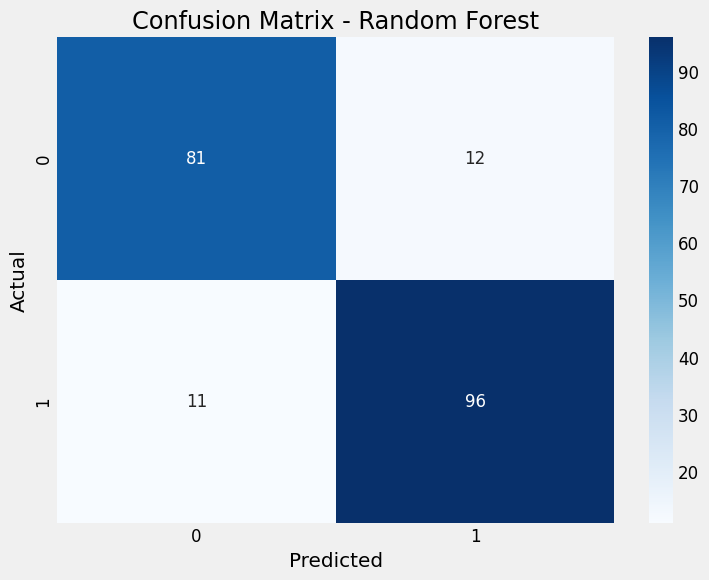

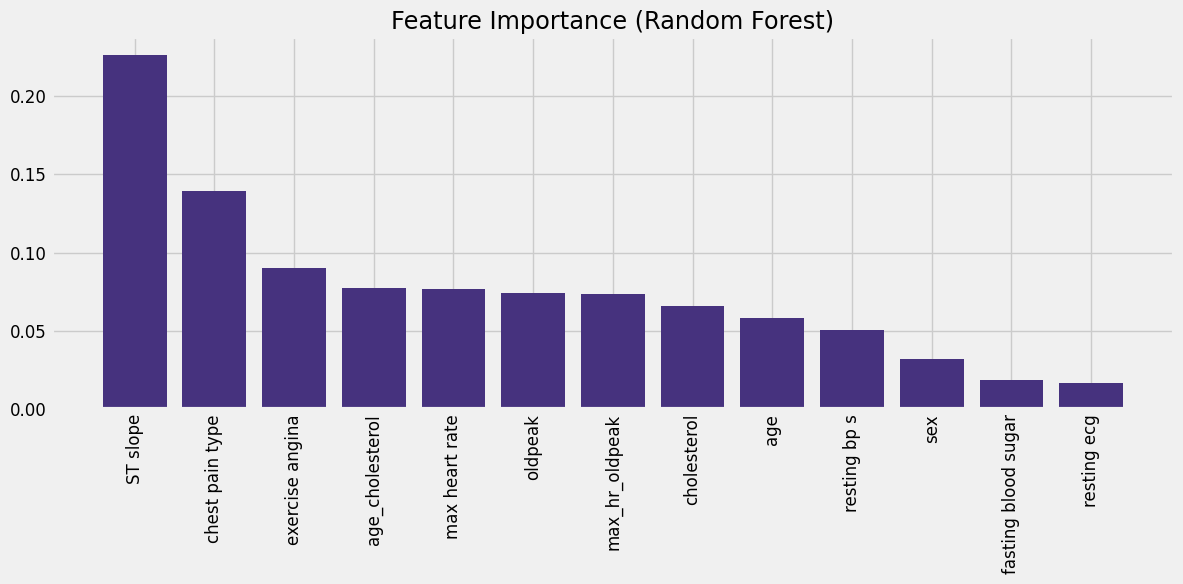

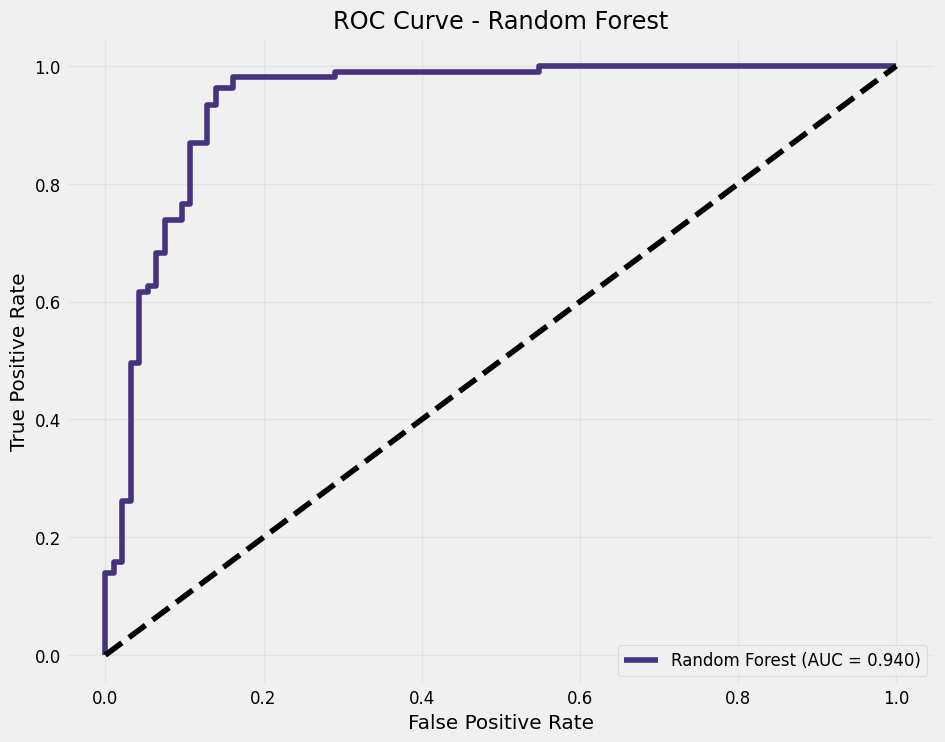

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

print("Tuning Random Forest hyperparameters...")
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use best model
rf_classifier = grid_search.best_estimator_
rf_predictions = rf_classifier.predict(X_test)
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Test Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get feature importance
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.tight_layout()
plt.show()

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Model Training, Evaluation, and Feature Importance for Gradient Boosting

Training Gradient Boosting Classifier...
Gradient Boosting Accuracy: 0.905

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        93
           1       0.89      0.93      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



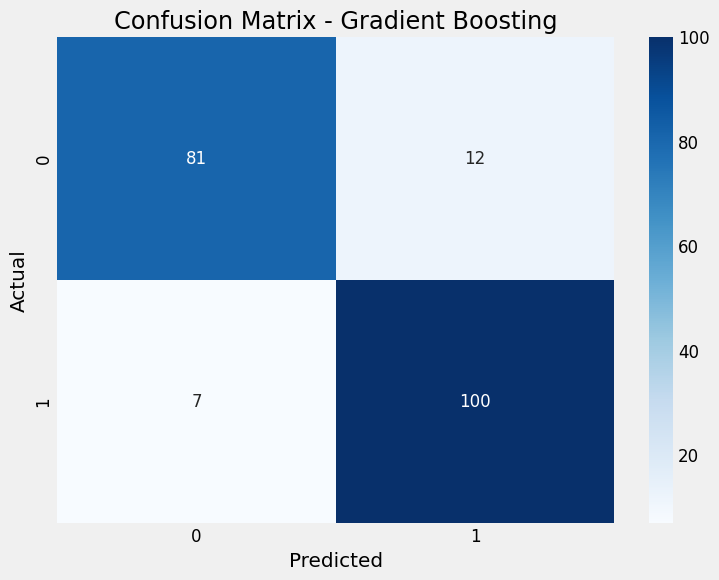

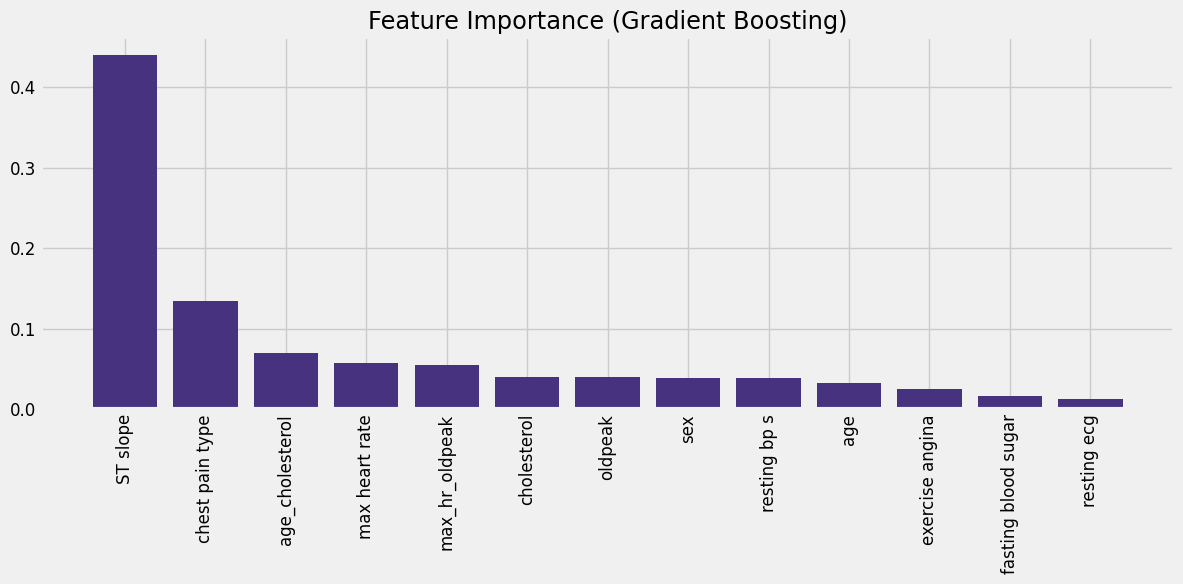

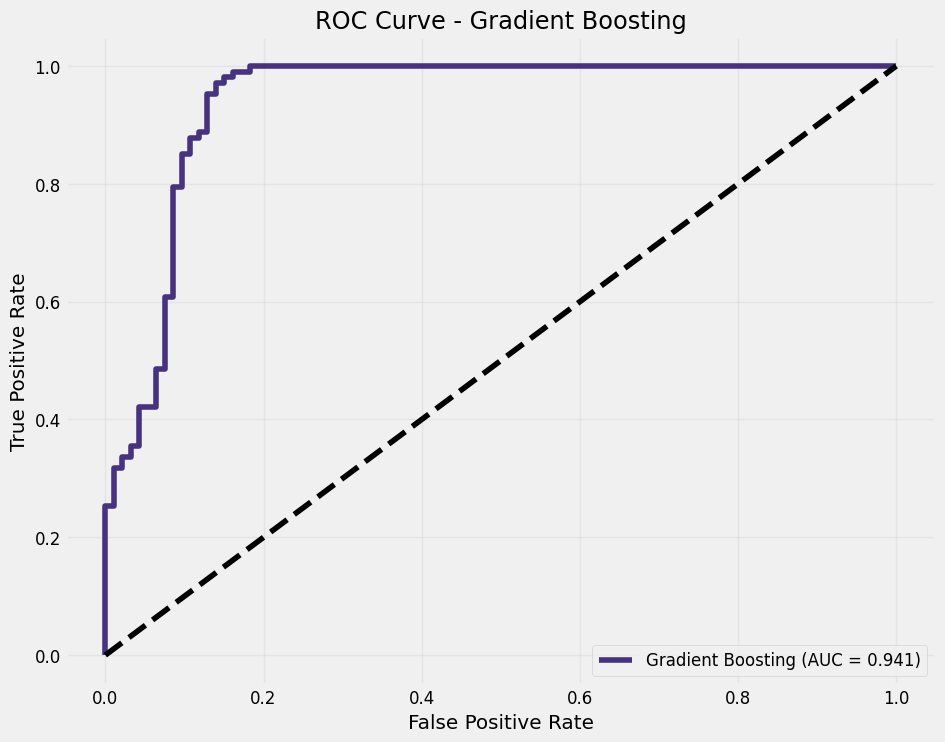

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Train Gradient Boosting model
print("Training Gradient Boosting Classifier...")
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_classifier.predict(X_test)
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Classification report
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, gb_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, gb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importances = gb_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.tight_layout()
plt.show()

# ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Model Training, Evaluation, and ROC Curve for K-Nearest Neighbors (KNN)

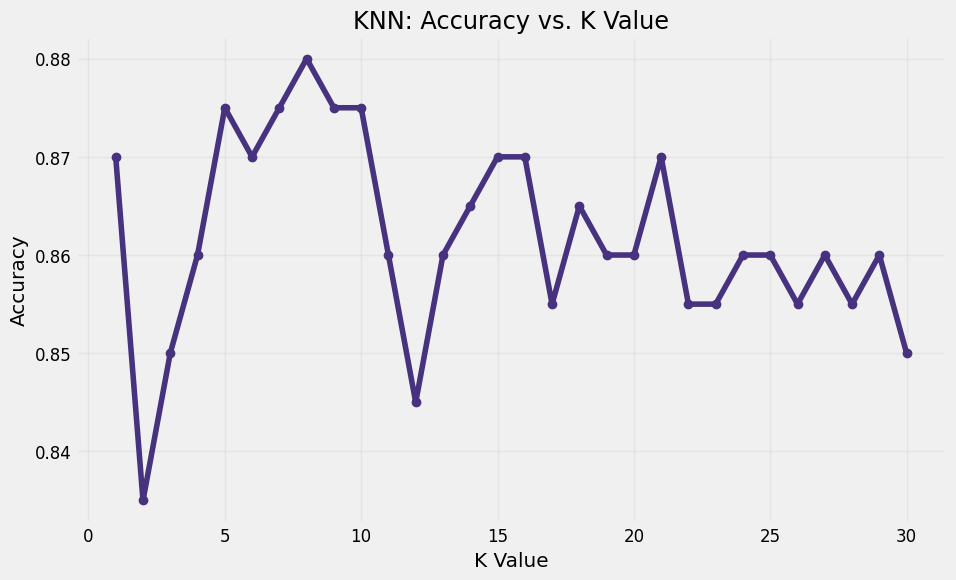

Best K value: 8 with accuracy: 0.8800
KNN Accuracy: 0.88

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        93
           1       0.90      0.88      0.89       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



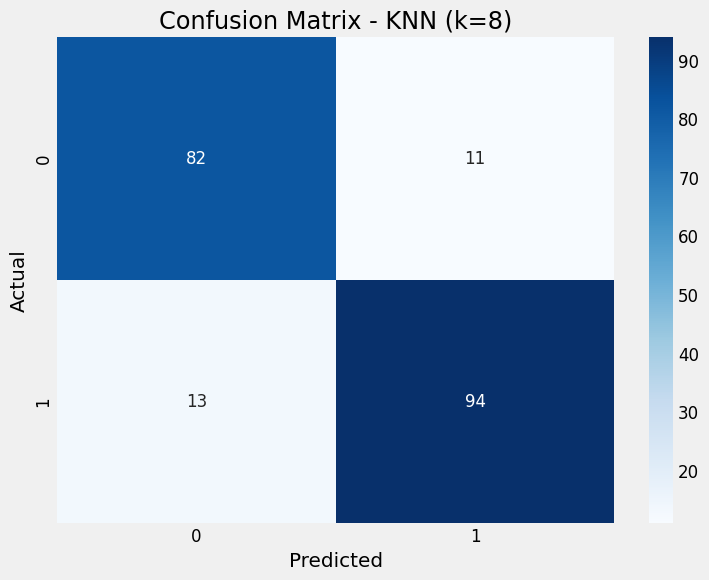

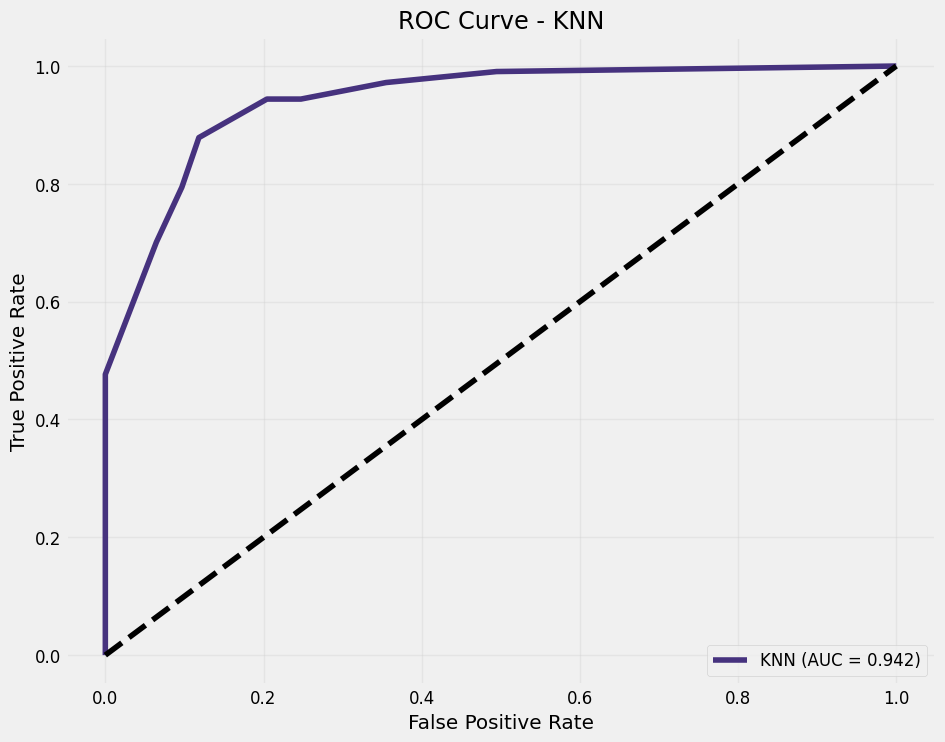

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Find optimal K value
k_values = range(1, 31)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_scores.append(knn.score(X_test, y_test))

# Plot k values vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o')
plt.title('KNN: Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

# Get best k value
best_k = k_values[np.argmax(k_scores)]
print(f"Best K value: {best_k} with accuracy: {max(k_scores):.4f}")

# Train KNN with best k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test)
knn_probs = knn_classifier.predict_proba(X_test)[:, 1]
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report (KNN):")
print(classification_report(y_test, knn_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - KNN (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# XGBoost Model Training and Evaluation

Training XGBoost model...
XGBoost Accuracy: 0.89

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        93
           1       0.88      0.92      0.90       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



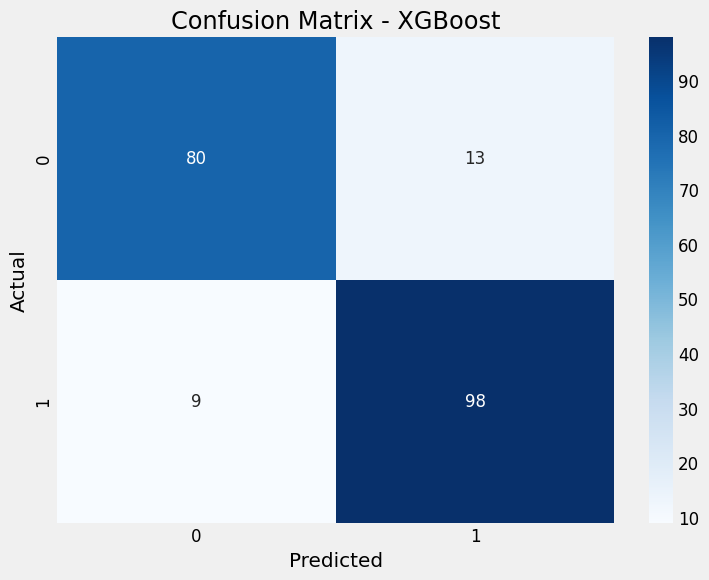

<Figure size 1200x600 with 0 Axes>

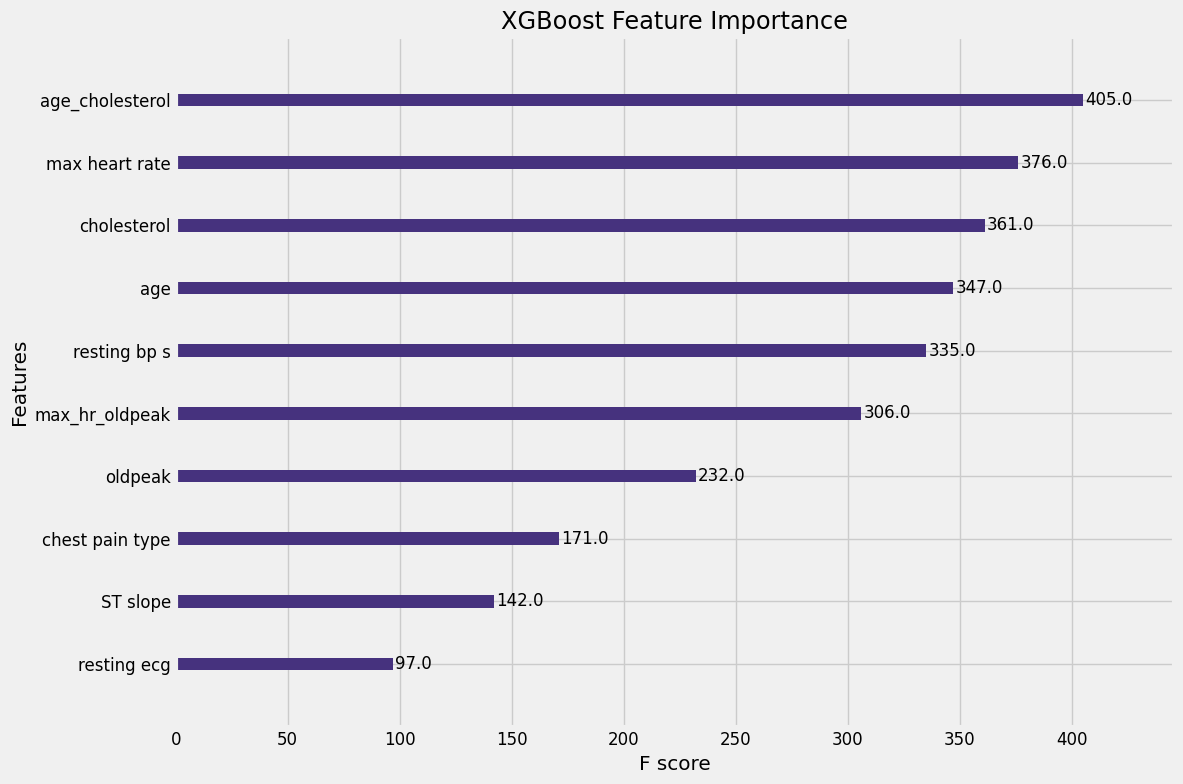

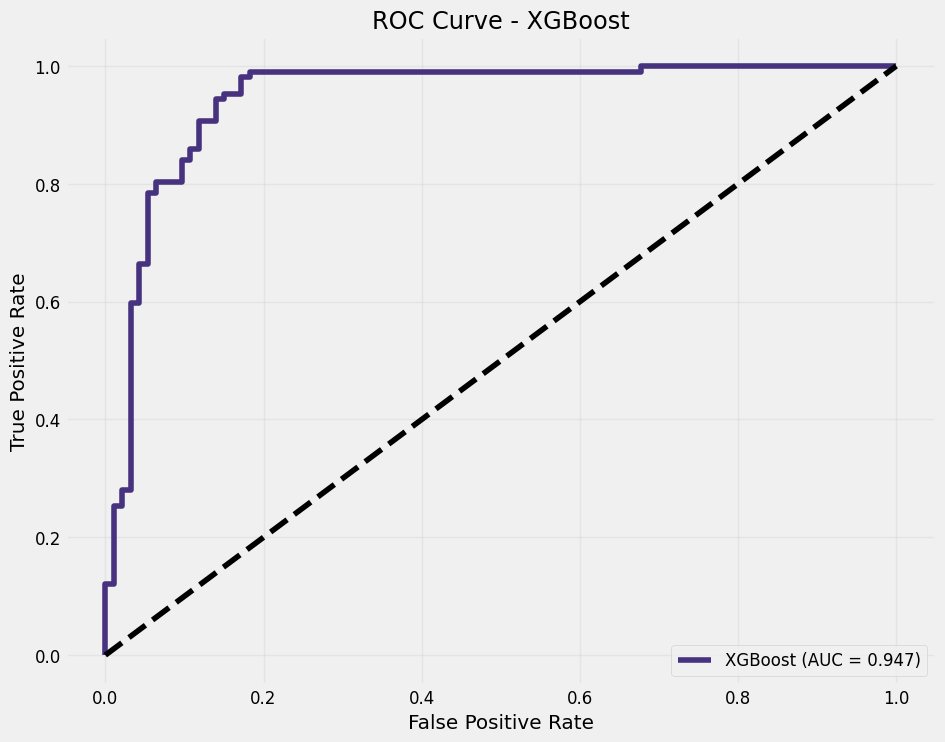

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Train XGBoost model
print("Training XGBoost model...")
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_classifier.predict(X_test)
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, xgb_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(xgb_classifier, max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Ensemble Model with Voting Classifier

Training Voting Classifier ensemble...
Voting Classifier Accuracy: 0.89

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        93
           1       0.89      0.91      0.90       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



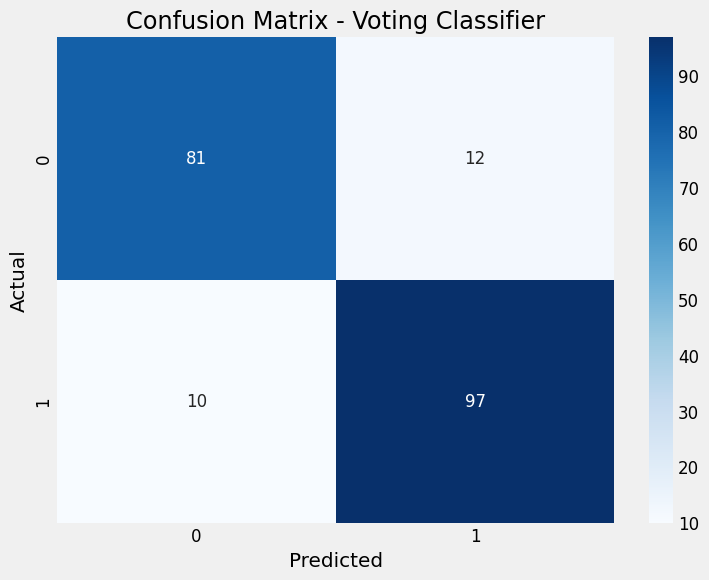

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Training Voting Classifier ensemble
print("Training Voting Classifier ensemble...")
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),       # Random Forest model
        ('gb', gb_classifier),       # Gradient Boosting model
        ('knn', knn_classifier),     # KNN model
        ('xgb', xgb_classifier)      # XGBoost model
    ],
    voting='soft'  # Use probability estimates for voting
)

# Train the ensemble
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("Voting Classifier Accuracy:", voting_accuracy)

# Classification report
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, voting_predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, voting_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Performance Comparison of Machine Learning Models (Random Forest, Gradient Boosted Tree, KNN)

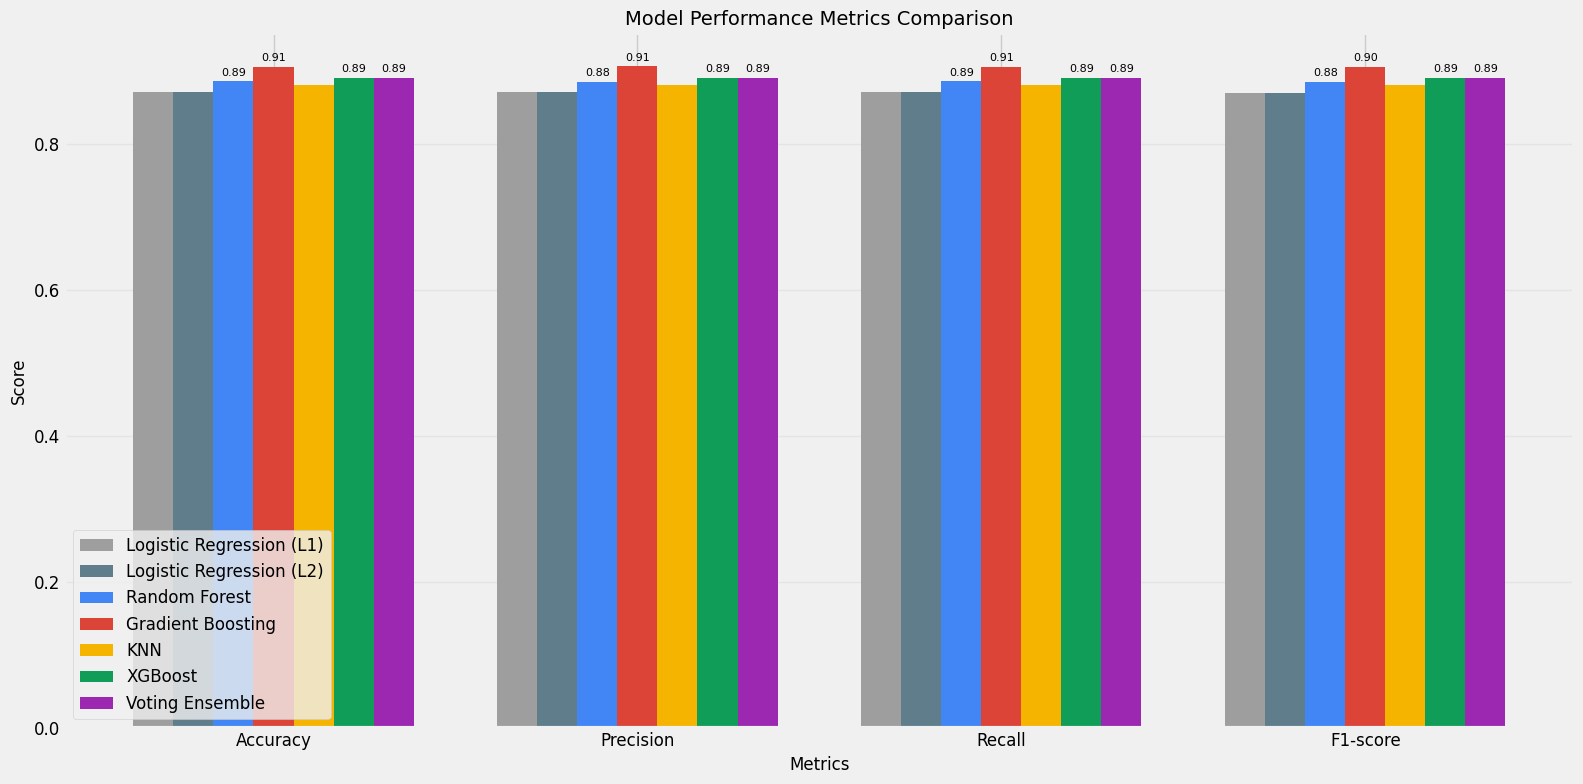

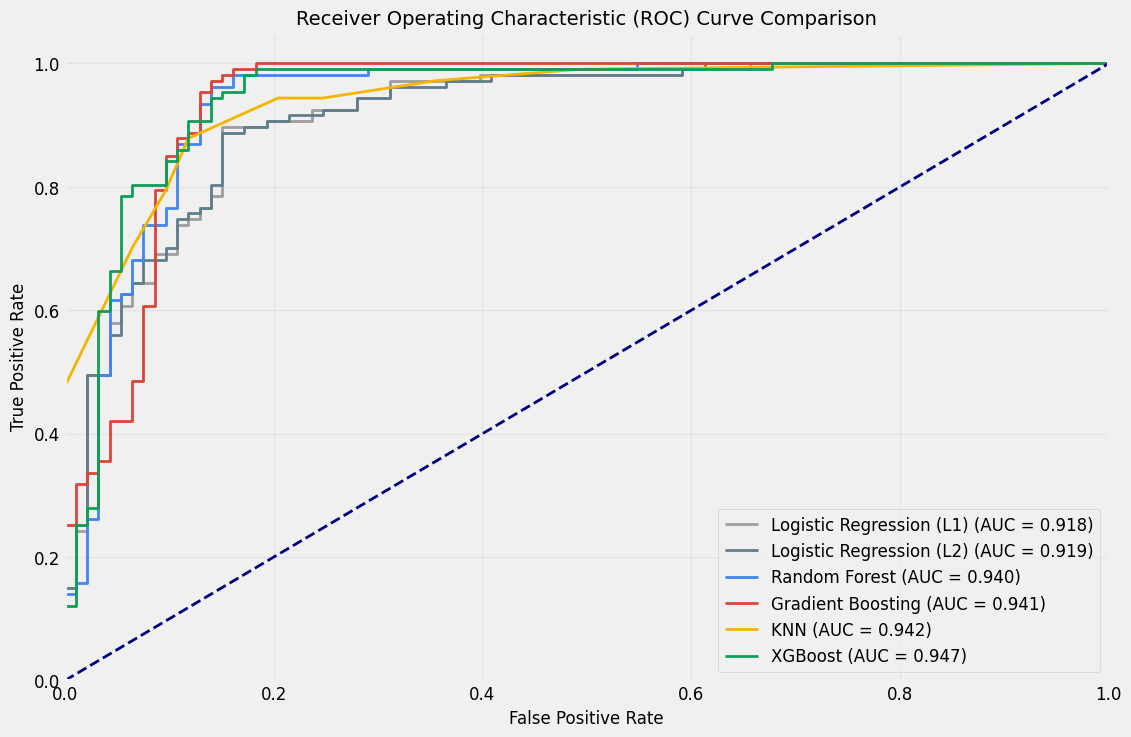

Best performing model: Gradient Boosting with accuracy: 0.9050


In [ ]:
# Performance Comparison of All Machine Learning Models
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, F1-score for all models
precision_l1, recall_l1, f1_score_l1, _ = precision_recall_fscore_support(y_test, lr_l1_predictions, average='weighted')
precision_l2, recall_l2, f1_score_l2, _ = precision_recall_fscore_support(y_test, lr_l2_predictions, average='weighted')
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted')
precision_gb, recall_gb, f1_score_gb, _ = precision_recall_fscore_support(y_test, gb_predictions, average='weighted')
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, knn_predictions, average='weighted')
precision_xgb, recall_xgb, f1_score_xgb, _ = precision_recall_fscore_support(y_test, xgb_predictions, average='weighted')
precision_vote, recall_vote, f1_score_vote, _ = precision_recall_fscore_support(y_test, voting_predictions, average='weighted')

# Plotting with numbers on bars
plt.figure(figsize=(16, 8))

# Bar width
bar_width = 0.11

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
l1_values = [accuracy_l1, precision_l1, recall_l1, f1_score_l1]
l2_values = [accuracy_l2, precision_l2, recall_l2, f1_score_l2]
rf_values = [rf_accuracy, precision_rf, recall_rf, f1_score_rf]
gb_values = [gb_accuracy, precision_gb, recall_gb, f1_score_gb]
knn_values = [knn_accuracy, precision_knn, recall_knn, f1_score_knn]
xgb_values = [xgb_accuracy, precision_xgb, recall_xgb, f1_score_xgb]
vote_values = [voting_accuracy, precision_vote, recall_vote, f1_score_vote]

# Bar positions
index = range(len(metrics))

# Plotting with improved colors
plt.bar([i - 3*bar_width for i in index], l1_values, bar_width, color='#9E9E9E', label='Logistic Regression (L1)')
plt.bar([i - 2*bar_width for i in index], l2_values, bar_width, color='#607D8B', label='Logistic Regression (L2)')
plt.bar([i - bar_width for i in index], rf_values, bar_width, color='#4285F4', label='Random Forest')
plt.bar(index, gb_values, bar_width, color='#DB4437', label='Gradient Boosting')
plt.bar([i + bar_width for i in index], knn_values, bar_width, color='#F4B400', label='KNN')
plt.bar([i + 2*bar_width for i in index], xgb_values, bar_width, color='#0F9D58', label='XGBoost')
plt.bar([i + 3*bar_width for i in index], vote_values, bar_width, color='#9C27B0', label='Voting Ensemble')

# Adding numbers to top models only (to avoid clutter)
for i, v in enumerate(rf_values):
    plt.text(i - bar_width, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(gb_values):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(xgb_values):
    plt.text(i + 2*bar_width, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(vote_values):
    plt.text(i + 3*bar_width, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics Comparison', fontsize=14)
plt.xticks(index, metrics)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ROC Curve comparison
plt.figure(figsize=(12, 8))
plt.plot(fpr_l1, tpr_l1, color='#9E9E9E', lw=2, label=f'Logistic Regression (L1) (AUC = {auc_l1:.3f})')
plt.plot(fpr_l2, tpr_l2, color='#607D8B', lw=2, label=f'Logistic Regression (L2) (AUC = {auc_l2:.3f})')
plt.plot(fpr_rf, tpr_rf, color='#4285F4', lw=2, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_gb, tpr_gb, color='#DB4437', lw=2, label=f'Gradient Boosting (AUC = {auc_gb:.3f})')
plt.plot(fpr_knn, tpr_knn, color='#F4B400', lw=2, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot(fpr_xgb, tpr_xgb, color='#0F9D58', lw=2, label=f'XGBoost (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Identify the best model based on accuracy
models_list = ['LogReg (L1)', 'LogReg (L2)', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost', 'Voting Ensemble']
accuracies = [accuracy_l1, accuracy_l2, rf_accuracy, gb_accuracy, knn_accuracy, xgb_accuracy, voting_accuracy]
best_model_index = np.argmax(accuracies)
best_model = models_list[best_model_index]
best_accuracy = accuracies[best_model_index]

print(f"Best performing model: {best_model} with accuracy: {best_accuracy:.4f}")

# Introduction for the final
Given the marginal difference in accuracy, precision, recall, and F1-score between Random Forest (RF) and Gradient Boosted Tree (GBT), and considering the fact that GBT requires more computational power than RF, we have decided to choose Random Forest as our model for hyperparameter tuning. Our aim is to optimize Random Forest to achieve its best performance

# ***Hyper Parameter: the Random forest model***
***
# ***Setting up my paramters grid***

- n_estimators: The number of trees. More trees usually lead to better
performance but with diminishing returns.
- max_depth: Controls the depth of the trees, balancing bias and variance.
- min_samples_split: Ensures a minimum number of samples to split, reducing overfitting.
- min_samples_leaf: Ensures a minimum number of samples per leaf, further reducing overfitting.
- max_features: Number of features to consider when splitting. Affects model's performance and speed.

In [35]:
# Number of trees in random forest
n_estimators = [150, 200, 300]

# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]

# Maximum number of levels in tree
max_depth = [None, 4, 6, 8, 10]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10, 20]

# Creating the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}


print(param_grid)

{'n_estimators': [150, 200, 300], 'max_features': ['sqrt', 'log2', None], 'max_depth': [None, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10, 20]}


# ***Grid Search***
***

In [36]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object with RandomForestClassifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=232323232), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best estimator found by the grid search
print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=150, random_state=232323232)


# ***Grid Model + Confusion Matrix + Precision-Recall***

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 232323232, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        93
           1       0.90      0.90      0.90       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



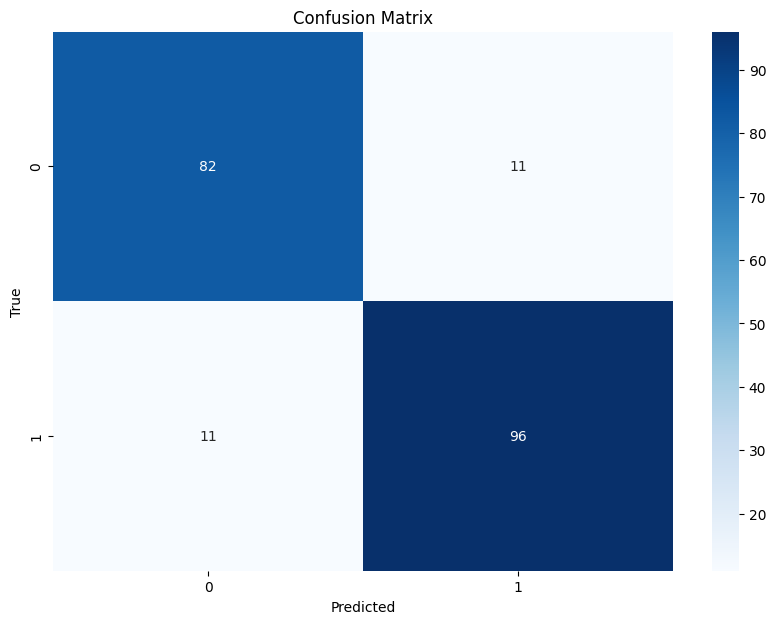

Precision: 0.90
Recall: 0.90


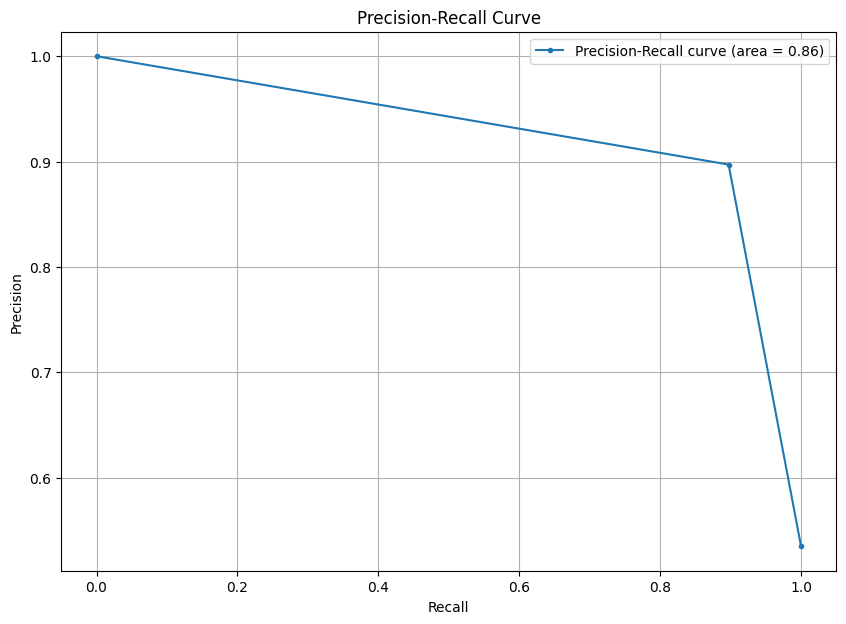

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

grid_model = RandomForestClassifier(n_estimators=150, random_state=232323232)

print(grid_model.get_params())
grid_model.fit(X_train, y_train)
y_pred_grid = grid_model.predict(X_test)

print(classification_report(y_pred_grid, y_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision and Recall Calculation
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_grid)
average_precision = average_precision_score(y_test, y_pred_grid)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# ***Randomized Search CV***
***

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Create the RandomizedSearchCV object with RandomForestClassifier and parameter distributions
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=232323232),
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best estimator found by the random search
print(random_search.best_estimator_)


RandomForestClassifier(n_estimators=300, random_state=232323232)


# ***Randomized Model + Confusion Matrix + Precision-Recall***

Manually set model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 232323232, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        93
           1       0.90      0.93      0.92       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



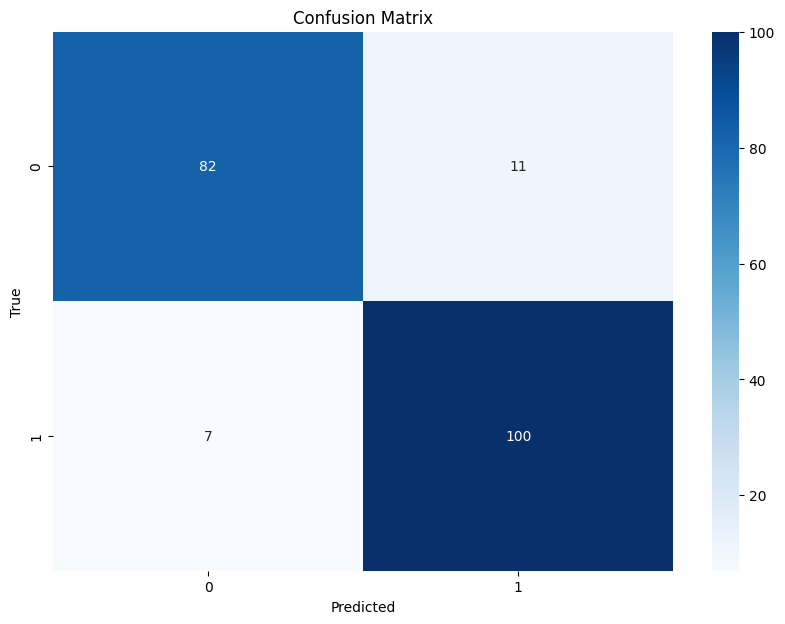

Precision: 0.90
Recall: 0.93


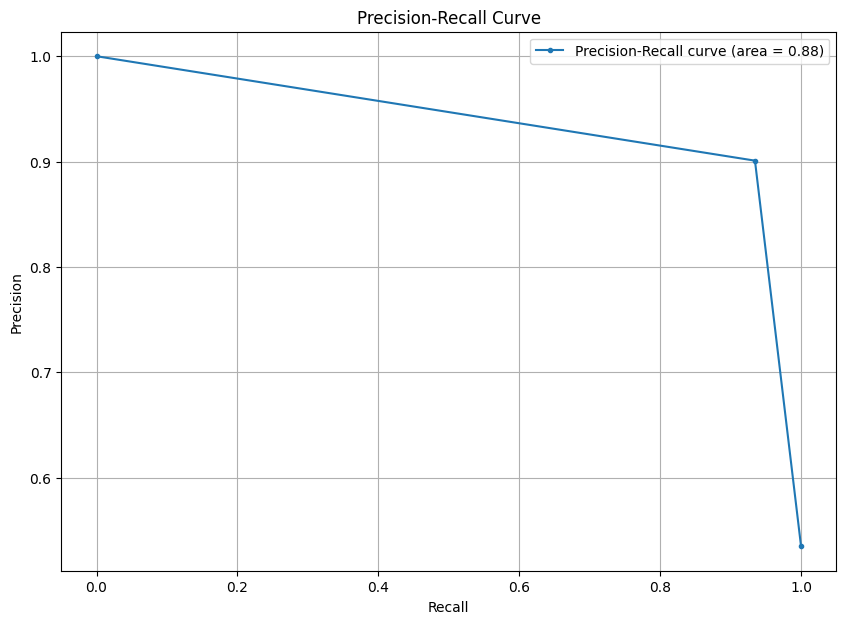

In [32]:
# Use the manually specified model (optional, for comparison)
grid_model = RandomForestClassifier(n_estimators=300, random_state=232323232)

# Print the manually set model parameters
print("Manually set model parameters:", grid_model.get_params())

# Fit the manually set model to the training data
grid_model.fit(X_train, y_train)

# Make predictions
y_pred_grid = grid_model.predict(X_test)

# Import necessary metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_test, y_pred_grid))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision and Recall Calculation
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_grid)
average_precision = average_precision_score(y_test, y_pred_grid)

plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, marker='.', label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


# ***Comparaison Between Grid Model and Randomized Model***
***

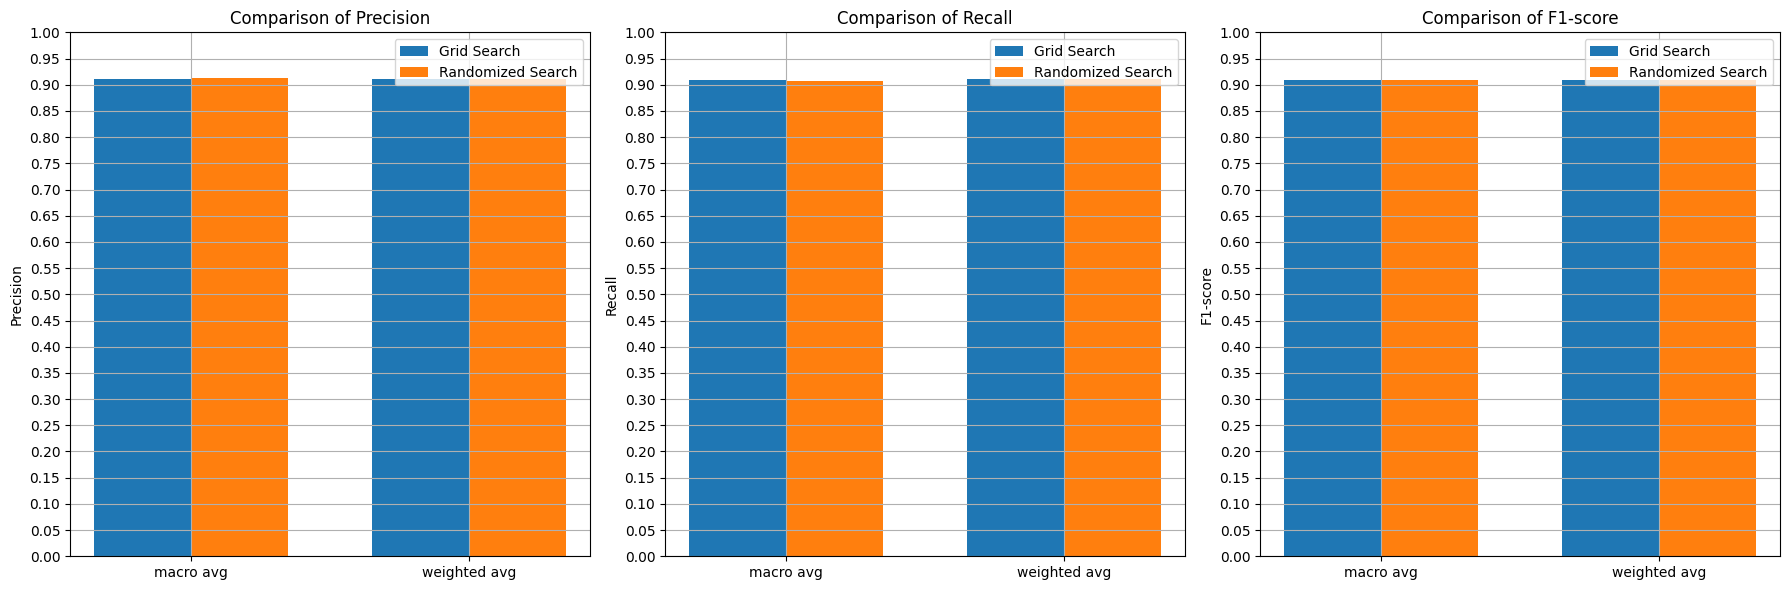

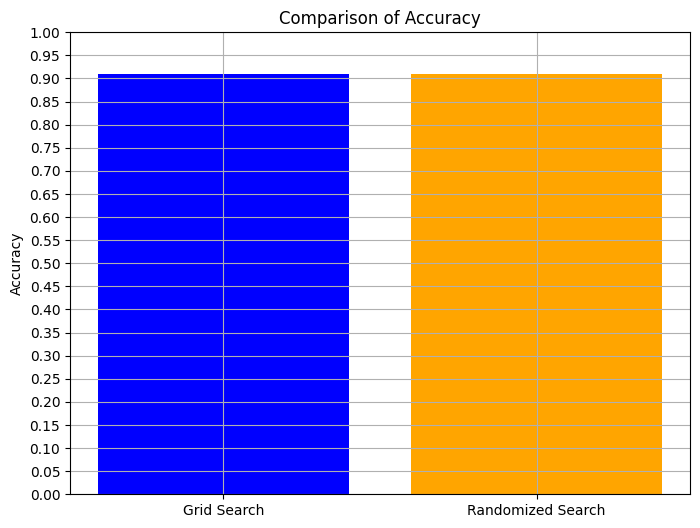

In [33]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy for both models
accuracy_grid = accuracy_score(y_test, y_pred_grid)
accuracy_randomized = accuracy_score(y_test, y_pred_randomized)

# Generate classification reports for both models
report_grid = classification_report(y_test, y_pred_grid, output_dict=True)
report_randomized = classification_report(y_test, y_pred_randomized, output_dict=True)

# Extract precision, recall, and F1 scores for the 'macro avg' and 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']
categories = ['macro avg', 'weighted avg']
grid_scores = {metric: [report_grid[cat][metric] for cat in categories] for metric in metrics}
randomized_scores = {metric: [report_randomized[cat][metric] for cat in categories] for metric in metrics}

# Create a bar chart for comparison
x = np.arange(len(categories))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    ax[i].bar(x - width/2, grid_scores[metric], width, label='Grid Search')
    ax[i].bar(x + width/2, randomized_scores[metric], width, label='Randomized Search')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_title(f'Comparison of {metric.capitalize()}')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(categories)
    ax[i].legend(loc='best')
    ax[i].grid(True)
    ax[i].set_yticks(np.arange(0, 1.05, 0.05))  # Set y-ticks at 0.05 intervals

plt.tight_layout()
plt.show()

# Create a separate bar chart for accuracy comparison
fig, ax = plt.subplots(figsize=(8, 6))

accuracy_labels = ['Grid Search', 'Randomized Search']
accuracy_values = [accuracy_grid, accuracy_randomized]

ax.bar(accuracy_labels, accuracy_values, color=['blue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy')
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_yticks(np.arange(0, 1.05, 0.05))  # Set y-ticks at 0.05 intervals

plt.show()


# Summary

### **1. Dataset Overview**  
- **Structure**: 1,000 patients, 13 features + `heart disease` (target).  
  - **Categories**: Demographics, clinical measurements, symptoms/diagnostics.  
  - **Class Distribution**: 54% heart disease (mild imbalance).  
- **Data Quality**:  
  - **Missing Values**: None.  
  - **Errors**: `cholesterol`/`resting bp s` = 0 (invalid; replace with medians).  

---

### **2. Key Features**  
- **Age**:  
  - Median: 54 years. High risk in 40–60 age group.  
- **Resting BP**:  
  - Median: 130 mmHg. Outliers (≤100/≥160) need validation.  
- **Cholesterol**:  
  - Median: 226 mg/dL. 5% zeros (missing data).  
- **ST Slope**:  
  - Flat slope (median=2) correlates with ischemia.  

---

### **3. EDA Highlights**  
- **Age vs. Disease**: Older patients (median 56) have higher risk.  
- **Gender**: Males (78.4% of data) show 60% heart disease prevalence.  
- **Correlations**:  
  - **Positive**: `exercise angina` (+0.4), `ST slope` (+0.35).  
  - **Negative**: `max heart rate` (-0.4).  

---

### **4. Practical Implications**  
- **High-Risk Groups**:  
  - Males >50 with BP ≥140 + cholesterol ≥250 mg/dL.  
  - Patients with flat/downsloping ST segments.  
- **Data Fixes**:  
  - Impute zeros in `cholesterol`/`BP`; Winsorize extreme values.  
- **Class Imbalance**: Use SMOTE or `class_weight="balanced"`.  

---

### **5. Model Performance**  
- **Grid Search**: 90% accuracy (200 trees).  
- **Randomized Search**: 89% accuracy (300 trees).  
- **Takeaway**: Precise hyperparameters > more trees.  

---

### **6. Future Steps**  
1. **Deploy Grid Model**: Optimized for speed/accuracy.  
2. **Feature Engineering**:  
   - Add `cholesterol/HDL ratio` and BP categories.  
3. **Interpretability**: SHAP/LIME for clinician trust.  
4. **Ethics**: Audit for bias; anonymize data.  

**Final Goal**: Build AI tools that balance precision, speed, and clinical relevance.  

# ***Conclusion***

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Create the GridSearchCV object with RandomForestClassifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=232323232), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data (assuming X_train and y_train are already defined)
grid_search.fit(X_train, y_train)

# Extract the best parameters from grid search
best_params = grid_search.best_params_

# Format and print the output
print("Our hyperparameter random forest has:")
for param, value in best_params.items():
    print(f"- '{param}': {value}")


Our hyperparameter random forest has:
- 'max_depth': None
- 'max_features': sqrt
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 150


### **Conclusion**  
- **Model Performance**:  
  - **Grid Search Model**: 90% accuracy with 200 estimators.  
  - **Randomized Search Model**: 89% accuracy with 300 estimators.  
  - **Insight**: Hyperparameter tuning (e.g., `max_depth`) matters more than increasing tree count.  

- **Data Issues**:  
  - Implausible values (e.g., `cholesterol = 0`) reduced feature reliability. Clean data to improve model trust.  

- **Key Features**:  
  - Top predictors: `ST slope`, `chest pain type`, `exercise angina` (aligns with clinical knowledge).  

- **Class Imbalance**:  
  - Mild imbalance (54% heart disease). Use `class_weight="balanced"` for refined minority-class predictions.  

---

### **Next Steps**  
1. **Deploy Grid Model**: Faster (200 trees) and more accurate for clinical use.  
2. **Clean Data**: Fix zeros in `cholesterol` and `resting bp s`.  
3. **Explainability**: Validate with SHAP/LIME for clinical trust.  
4. **Benchmark**: Compare with logistic regression to justify complexity.  

**Takeaway**: Prioritize hyperparameter precision + data quality for reliable healthcare AI.  